# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import sys
import json
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
%matplotlib inline
# Import API key
sys.path.append('..')
from api_keys import (weather_api_key, g_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# np.random.seed(20200201)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
cities

600


['los llanos de aridane',
 'cap malheureux',
 'tuktoyaktuk',
 'punta arenas',
 'aporawan',
 'faya',
 'castro',
 'saint-philippe',
 'dalby',
 'ushuaia',
 'dzhebariki-khaya',
 'qaanaaq',
 'dumas',
 'albany',
 'zhigansk',
 'lata',
 'busselton',
 'acarau',
 'son la',
 'new norfolk',
 'atuona',
 'kapaa',
 'abay',
 'hermanus',
 'bosanska krupa',
 'husavik',
 'kidal',
 'sterling',
 'cape town',
 'cheuskiny',
 'dikson',
 'kloulklubed',
 'savannah bight',
 'revelstoke',
 'coihaique',
 'mahebourg',
 'kumluca',
 'kamenskoye',
 'hobart',
 'tomatlan',
 'mataura',
 'ribeira grande',
 'georgetown',
 'lebu',
 'chuy',
 'samusu',
 'cabo san lucas',
 'tonj',
 'taolanaro',
 'dingle',
 'iqaluit',
 'karakendzha',
 'upernavik',
 'nova olimpia',
 'kazerun',
 'butaritari',
 'aloleng',
 'belaya gora',
 'katsuura',
 'rikitea',
 'luanda',
 'hilo',
 'mar del plata',
 'carnarvon',
 'arraial do cabo',
 'hovd',
 'barrow',
 'dunedin',
 'barentsburg',
 'antalaha',
 'ostrovnoy',
 'port alfred',
 'saint george',
 'okhtyr

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
openweathermap_base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
name_lst, lon_lst, lat_lst, max_temp_lst,  humidity_lst, cloudiness_lst, wind_speed_lst, country_lst, date_lst = [], [], [], [], [], [], [], [], []

print('Beginning Data Retrieval')
print('-----------------------------')
for index, city in enumerate(cities[0:3]):
    city_url = f'{openweathermap_base_url}{city}&appid={weather_api_key}'
    print(city_url)
    city_response = requests.get(city_url).json()
    print(f'Processing Record {index} | {city}')
    print(json.dumps(city_response, indent = 4))
    try:
        lon_lst.append(city_response['coord']['lon'])
        lat_lst.append(city_response['coord']['lat'])
        max_temp_lst.append(city_response['main']['temp_max'])
        humidity_lst.append(city_response['main']['humidity'])
        cloudiness_lst.append(city_response['clouds']['all'])
        wind_speed_lst.append(city_response['wind']['speed'])
        country_lst.append(city_response['sys']['country'])
        date_lst.append(city_response['dt'])
        name_lst.append(city)
    except:
        print('City not found. Skipping...')
    time.sleep(1)
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=los llanos de aridane&appid=bf5be364cda6132d334ddae144c0c4ef
Processing Record 0 | los llanos de aridane
{
    "coord": {
        "lon": -17.9182,
        "lat": 28.6585
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 58.55,
        "feels_like": 58.8,
        "temp_min": 55.99,
        "temp_max": 62.6,
        "pressure": 1016,
        "humidity": 88
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.3,
        "deg": 0
    },
    "clouds": {
        "all": 90
    },
    "dt": 1612400455,
    "sys": {
        "type": 1,
        "id": 2377,
        "country": "ES",
        "sunrise": 1612425482,
        "sunset": 1612464790
    },
    "timezone": 0,
    "id": 2514651,
    "na

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_weather_df = pd.DataFrame({'City': name_lst, 'Lat': lat_lst, 'Lng': lon_lst, 'Max Temp': max_temp_lst
                               , 'Humidity': humidity_lst, 'Cloudiness': cloudiness_lst, 'Wind Speed': wind_speed_lst
                               , 'Country': country_lst, 'Date': date_lst})
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,66.99,89,0,1.01,ZA,1612296107
1,mansa,29.9833,75.3833,54.97,42,0,5.32,IN,1612296108
2,talnakh,69.4865,88.3972,-10.71,83,100,6.24,RU,1612296110
3,ushuaia,-54.8000,-68.3000,53.60,82,75,14.97,AR,1612296112
4,ukiah,39.1502,-123.2078,53.60,66,90,3.44,US,1612296002


In [13]:
city_weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [14]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,22.534012,13.252451,49.005165,72.990842,52.600733,8.818626,1.612296e+09
std,32.465466,89.186423,32.483442,19.976452,40.538824,6.293592,2.102052e+02
min,-54.800000,-179.166700,-45.740000,14.000000,0.000000,0.110000,1.612296e+09
25%,-4.283550,-63.463400,28.400000,65.000000,6.000000,4.000000,1.612296e+09
50%,28.998050,15.645750,59.000000,78.000000,63.000000,7.515000,1.612296e+09
75%,49.808375,88.711825,75.720000,87.000000,92.000000,11.797500,1.612297e+09
max,78.218600,179.316700,94.140000,100.000000,100.000000,43.220000,1.612297e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
bad_humidify = city_weather_df.loc[city_weather_df['Humidity'] > 100, :]
bad_humidify

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [16]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,22.534012,13.252451,49.005165,72.990842,52.600733,8.818626,1.612296e+09
std,32.465466,89.186423,32.483442,19.976452,40.538824,6.293592,2.102052e+02
min,-54.800000,-179.166700,-45.740000,14.000000,0.000000,0.110000,1.612296e+09
25%,-4.283550,-63.463400,28.400000,65.000000,6.000000,4.000000,1.612296e+09
50%,28.998050,15.645750,59.000000,78.000000,63.000000,7.515000,1.612296e+09
75%,49.808375,88.711825,75.720000,87.000000,92.000000,11.797500,1.612297e+09
max,78.218600,179.316700,94.140000,100.000000,100.000000,43.220000,1.612297e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df
city_weather_df.to_csv('Output/city_weather.csv')

In [19]:
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,66.99,89,0,1.01,ZA,1612296107
1,mansa,29.9833,75.3833,54.97,42,0,5.32,IN,1612296108
2,talnakh,69.4865,88.3972,-10.71,83,100,6.24,RU,1612296110
3,ushuaia,-54.8000,-68.3000,53.60,82,75,14.97,AR,1612296112
4,ukiah,39.1502,-123.2078,53.60,66,90,3.44,US,1612296002
...,...,...,...,...,...,...,...,...,...
541,sanlucar de barrameda,36.7781,-6.3515,59.00,94,20,6.91,ES,1612296768
542,manggar,-2.8833,108.2667,79.07,84,93,14.27,ID,1612296769
543,nouadhibou,20.9310,-17.0347,66.20,82,0,14.97,MR,1612296770
544,te anau,-45.4167,167.7167,55.78,87,100,2.06,NZ,1612296772


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

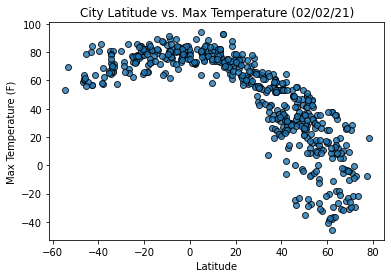

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp']
           , edgecolor = 'black', alpha = 0.8)

plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
plt.savefig('Output/City_Latitude_vs_Max_Temperature.png')

### The code above analyzed the relationship between city latitude and max temperature. It shows that the max temperature near latitude is relatively higher. The higher the absolute value of latitude is,  the lower the max temperature gets.

## Latitude vs. Humidity Plot

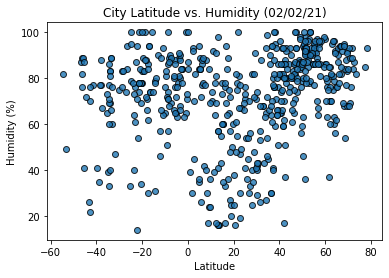

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity']
           , edgecolor = 'black', alpha = 0.8)

plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
plt.savefig('Output/City_Latitude_vs_Humidity.png')

### The code above analyzed the relationship between city latitude and humidity. 

## Latitude vs. Cloudiness Plot

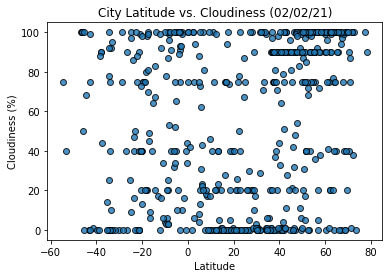

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness']
           , edgecolor = 'black', alpha = 0.8)

plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
plt.savefig('Output/City_Latitude_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

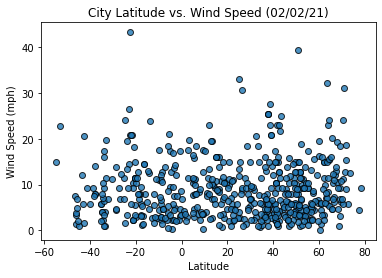

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed']
           , edgecolor = 'black', alpha = 0.8)

plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig('Output/City_Latitude_vs_Wind_Speed.png')

### The code above analyzed the relationship between city latitude and cloudiness. It shows that there are more cities with lower wind speed regardless of the latitude but no obvious correlation between city latitude and cloudiness. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
northern_df = clean_city_data.loc[clean_city_data['Lat'] > 0, :]
southern_df = clean_city_data.loc[clean_city_data['Lat'] < 0, :]

The r-squared value is 0.712252175567233


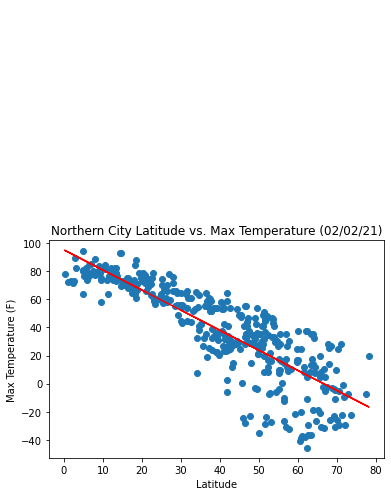

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(northern_df['Lat'], northern_df['Max Temp'])

plt.title(f'Northern City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Lat'], northern_df['Max Temp'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * northern_df['Lat'] + intercept
plt.plot(northern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (0, 260), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Northern_City_Latitude_vs_Max_Temperature.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.3210063215476037


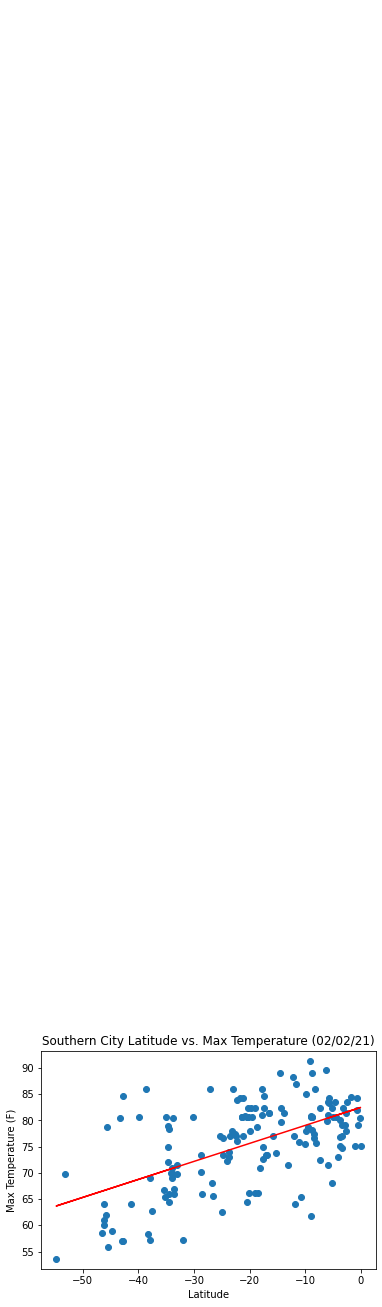

<Figure size 432x288 with 0 Axes>

In [26]:
plt.scatter(southern_df['Lat'], southern_df['Max Temp'])

plt.title(f'Southern City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'], southern_df['Max Temp'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * southern_df['Lat'] + intercept
plt.plot(southern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (-30, 290), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Southern_City_Latitude_vs_Max_Temperature.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.20699676375320142


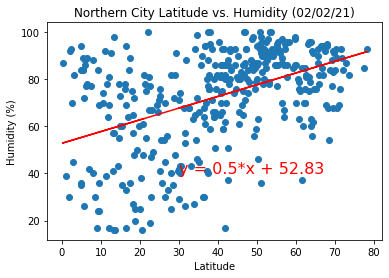

<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(northern_df['Lat'], northern_df['Humidity'])

plt.title(f'Northern City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Lat'], northern_df['Humidity'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * northern_df['Lat'] + intercept
plt.plot(northern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (30, 40), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Northern_City_Latitude_vs_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.045582479789413585


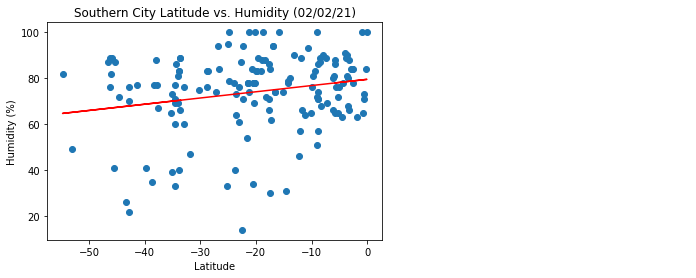

<Figure size 432x288 with 0 Axes>

In [28]:
plt.scatter(southern_df['Lat'], southern_df['Humidity'])

plt.title(f'Southern City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'], southern_df['Humidity'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * southern_df['Lat'] + intercept
plt.plot(southern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (30, 40), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Southern_City_Latitude_vs_Humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.1542275120345546


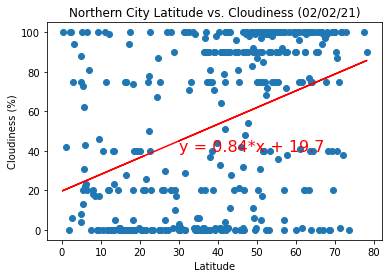

<Figure size 432x288 with 0 Axes>

In [29]:
plt.scatter(northern_df['Lat'], northern_df['Cloudiness'])

plt.title(f'Northern City Latitude vs. Cloudiness ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Lat'], northern_df['Cloudiness'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * northern_df['Lat'] + intercept
plt.plot(northern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (30, 40), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Northern_City_Latitude_vs_Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.008784959806516831


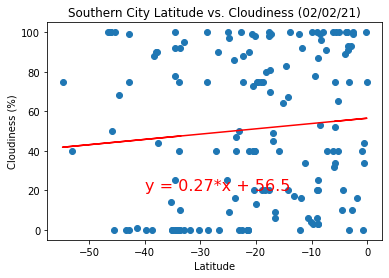

<Figure size 432x288 with 0 Axes>

In [30]:
plt.scatter(southern_df['Lat'], southern_df['Cloudiness'])

plt.title(f'Southern City Latitude vs. Cloudiness ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'], southern_df['Cloudiness'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * southern_df['Lat'] + intercept
plt.plot(southern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (-40, 20), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Southern_City_Latitude_vs_Cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0021858994120950584


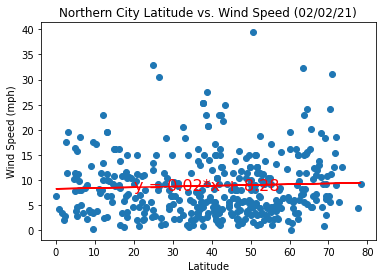

<Figure size 432x288 with 0 Axes>

In [31]:
plt.scatter(northern_df['Lat'], northern_df['Wind Speed'])

plt.title(f'Northern City Latitude vs. Wind Speed ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Lat'], northern_df['Wind Speed'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * northern_df['Lat'] + intercept
plt.plot(northern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (20, 8), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Northern_City_Latitude_vs_Wind_Speed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0018577436246170877


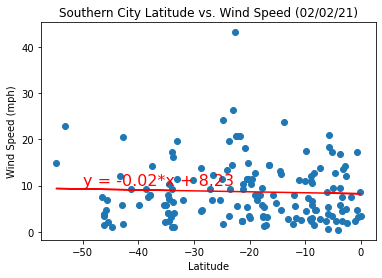

<Figure size 432x288 with 0 Axes>

In [32]:
plt.scatter(southern_df['Lat'], southern_df['Wind Speed'])

plt.title(f'Southern City Latitude vs. Wind Speed ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'], southern_df['Wind Speed'])
formular = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'
y_pred = slope * southern_df['Lat'] + intercept
plt.plot(southern_df['Lat'], y_pred, color = 'red')
plt.annotate(formular, (-50, 10), color = 'red', fontsize = 16)

print(f'The r-squared value is {rvalue**2}')

plt.show()
plt.savefig('Output/Southern_City_Latitude_vs_Wind_Speed.png')